## Steps for performing the Analysis.
1.Reading and understanding the data<br>
2.Cleaning the data<br>
3.Performing EDA<br>
4.Preparing the data for Modeling<br>
5.Modeling<br>
6.Analysing the results<br>


## 1. Reading and understanding the data

In [1]:
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

In [3]:
## reading the dataset
leads_df=pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#inspecting number of rows and columns in the dataset
leads_df.shape

(9240, 37)

In [5]:
#inspecting the data types of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#looking at the statistics of the dataset.
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2.Cleaning data

In [7]:
##Drpping duplicates if any
leads_df.drop_duplicates(subset='Prospect ID',keep='first',inplace=True)
leads_df.shape

(9240, 37)

Since there is no change in the number of records, we can say that there are no duplicate records present in the dataset.

In [8]:
#As we have some columns containg "Select values" indicating that the information is not provided by the leads.<br>
#We can convert select values will null values.
leads_df=leads_df.replace('Select',np.nan)

In [9]:
#Checking for null values in each col.
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#lets see the percentage of null values in each col.
round(leads_df.isnull().sum()/len(leads_df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Let us drop the columns containing more than 40% null values
for i in leads_df.columns:
    if round(leads_df[i].isnull().sum()/len(leads_df[i])*100,2)>=40:
        leads_df.drop(i,axis=1,inplace=True)

In [12]:
#looking at the dataset after dropping the columns with more than 40% null values
round(leads_df.isnull().sum()/len(leads_df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## 3. Performing EDA

#### 3.1 Categorical variable Analysis

In [13]:
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Sweden                     3
Bangladesh                 2
Ghana                      2
Belgium                    2
Philippines                2
Netherlands                2
Italy                      2
China                      2
Uganda                     2
Asia/Pacific Region        2
Kenya                      1
Denmark                    1
Malaysia                   1
Indonesia                  1
Sri Lanka                  1
Tanzania      

In [14]:
leads_df['Country'].mode()

0    India
dtype: object

In [15]:
##Replacing null values in Country column with India as India is the most frequently occuring value
leads_df['Country']=leads_df['Country'].replace(np.nan,'India')

In [16]:
leads_df['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
Canada                     4
South Africa               4
Sweden                     3
Bangladesh                 2
Italy                      2
Asia/Pacific Region        2
China                      2
Uganda                     2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Indonesia                  1
Kenya                      1
Tanzania                   1
Vietnam                    1
Denmark                    1
Switzerland                1
Liberia       

In [17]:
#Observing City column
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
leads_df['City'].mode()

0    Mumbai
dtype: object

In [19]:
#Let us fill the misisng values in City col with the mode i.e Mumbai
leads_df['City']=leads_df['City'].replace(np.nan,'Mumbai')

In [20]:
leads_df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
#Observing Specilization col
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# Let us replace the the NaN value of Specialization column as Not Specified

leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')


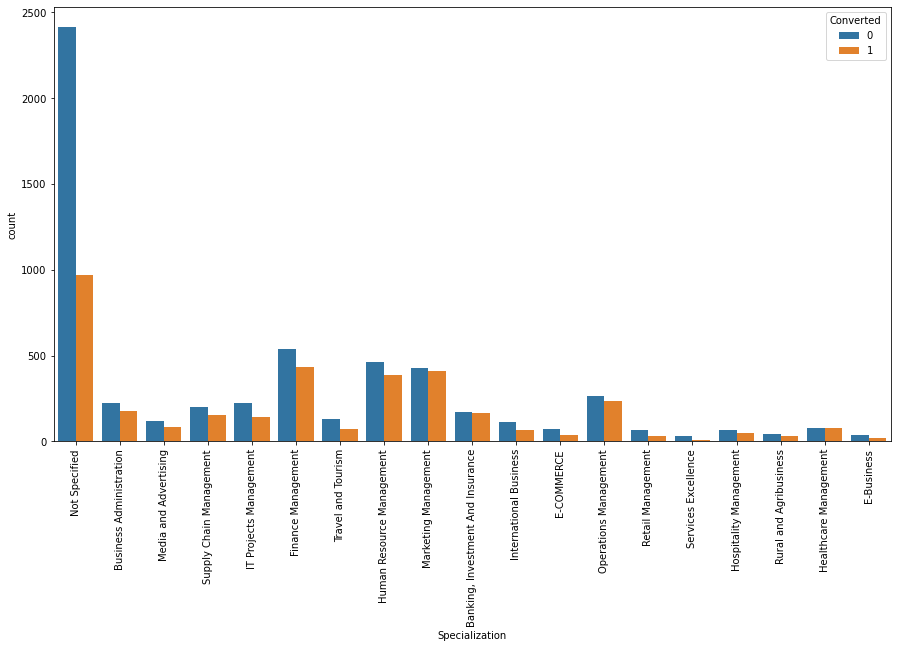

In [23]:
# Visualizing the Specialization columnn 

plt.figure(figsize=(15,8))
sp=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
sp.set_xticklabels(sp.get_xticklabels(),rotation=90)
plt.show()

In [24]:
#We can see that customers with specilization in management have higher number of leads and as well as leads converted.
#let us group all the management specilizations into one as they are showing similar trends.
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

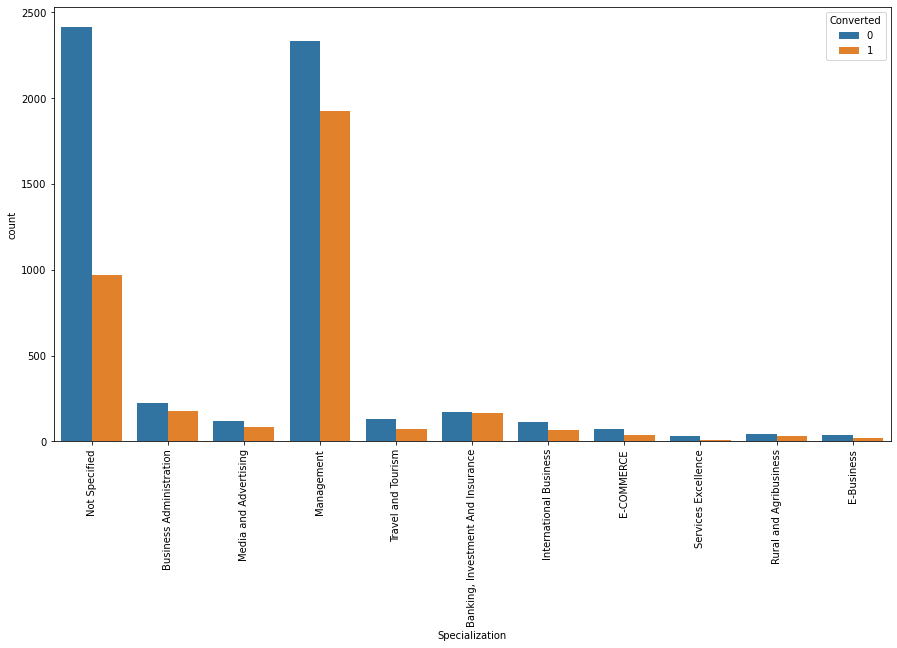

In [25]:
# Visualizing the Specialization columnn after grouping

plt.figure(figsize=(15,8))
sp=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
sp.set_xticklabels(sp.get_xticklabels(),rotation=90)
plt.show()

In [26]:
#Observing the Current occupation col
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# Replacing NaN values in occupation col with mode value
m=leads_df['What is your current occupation'].mode()[0]
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan,m )

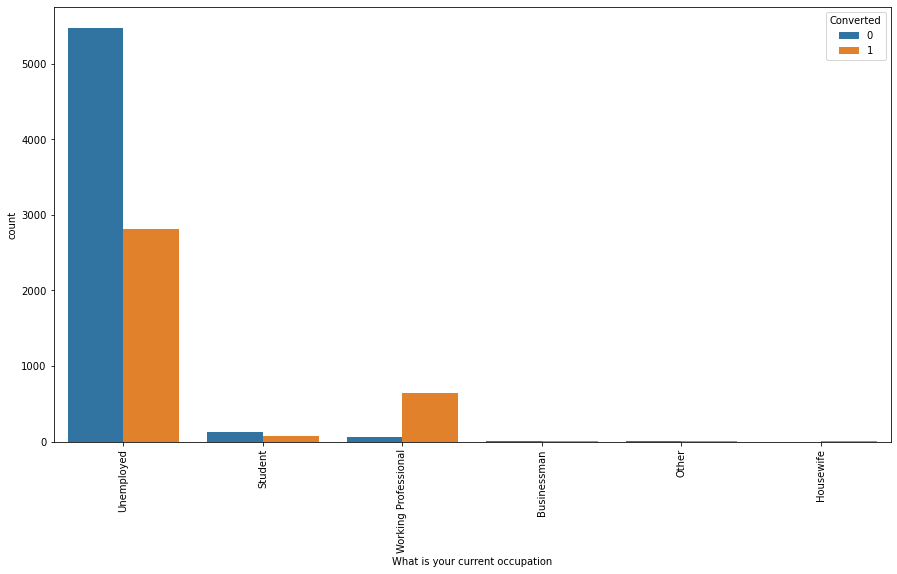

In [28]:
# visualizing the column 'What is your current occupation'

plt.figure(figsize=(15,8))
occ=sns.countplot(leads_df['What is your current occupation'], hue=leads_df.Converted)
occ.set_xticklabels(occ.get_xticklabels(),rotation=90)
plt.show()

We can see that working professionals have the higher lead conversion

In [29]:
#Observing Tags col
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [30]:
# replacing NaN values with "Not Specified" as they might have forgot to specify

leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not Specified')

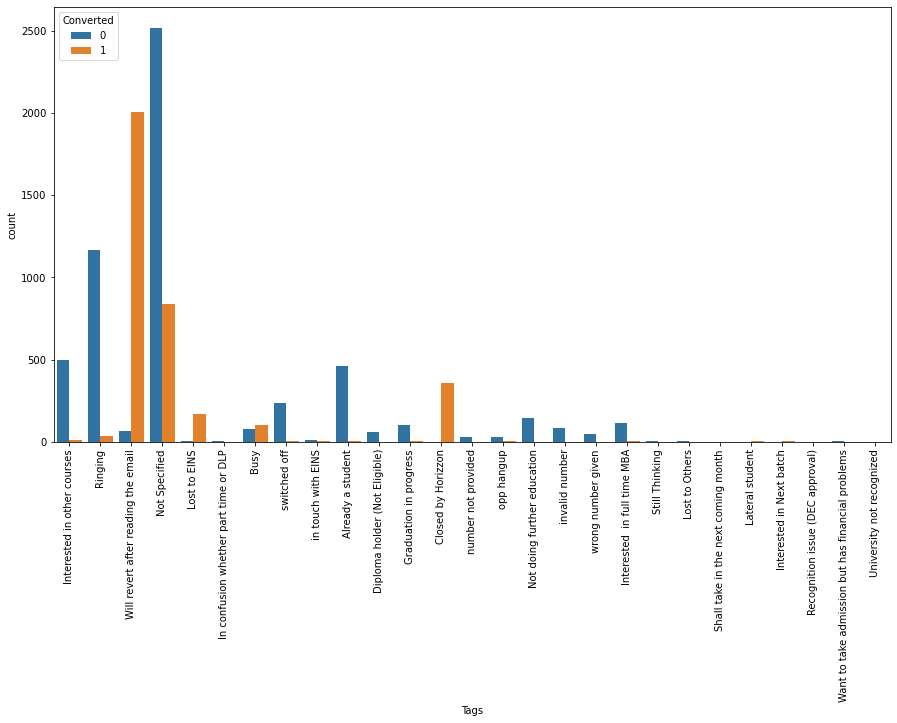

In [31]:
# visualizing the column Tags

plt.figure(figsize=(15,8))
tags=sns.countplot(leads_df['Tags'], hue=leads_df.Converted)
tags.set_xticklabels(tags.get_xticklabels(),rotation=90)
plt.show()

In [32]:
# Replacing and merging the lower frequency values of tags column to 'Other_Tags'

leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_df['Tags'] = leads_df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [33]:
# checking the percentage of missing values in dataset

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [34]:
#Let us drop the 'What matters most to you in choosing a course' col as it has more null values and moreover irrelevant for analysis.
leads_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [35]:
#Let us observe the Lead source column.
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

In [36]:
#Let us group values with nan  lower frequency into "Others"

leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
leads_df['Lead Source']=leads_df['Lead Source'].replace([np.nan,'bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

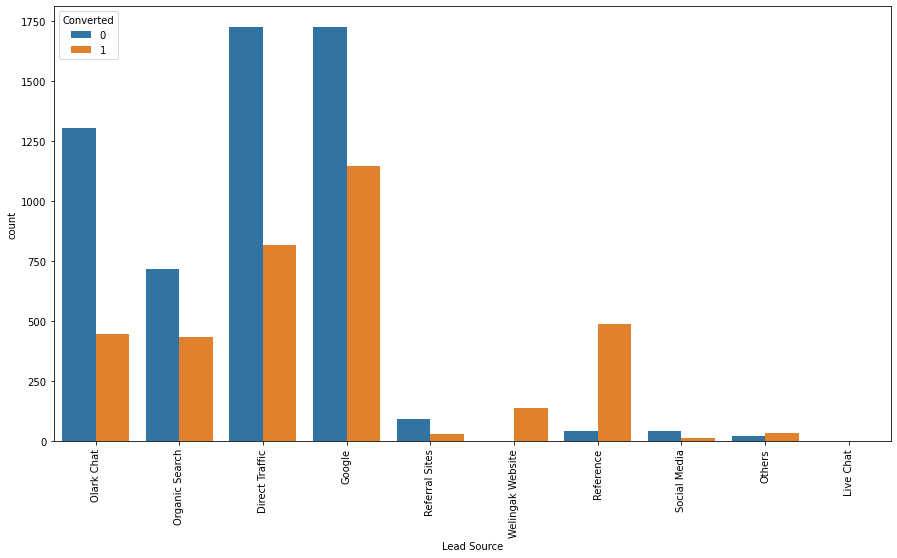

In [37]:
# visualizing the Lead Source col

plt.figure(figsize=(15,8))
ls=sns.countplot(leads_df['Lead Source'], hue=leads_df.Converted)
ls.set_xticklabels(ls.get_xticklabels(),rotation=90)
plt.show()

<li>
    <ol>We can see that Direct traffic and Google are generating the maximum number of leads.
    </ol>
<ol>Reference and welingak website lead source have high conversion rate.</ol>
    </li>

In [38]:
#Let us observe the Last activity col
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
#Let us replace low frequent and null values with  others 
leads_df['Last Activity']=leads_df['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [40]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [41]:
#Let us drop the rows containg null values in the 'TotalVisits' and 'Page Views Per Visit' cols
leads_df.dropna(inplace=True)

In [42]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [43]:
#Let us look at Lead Origin col
leads_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

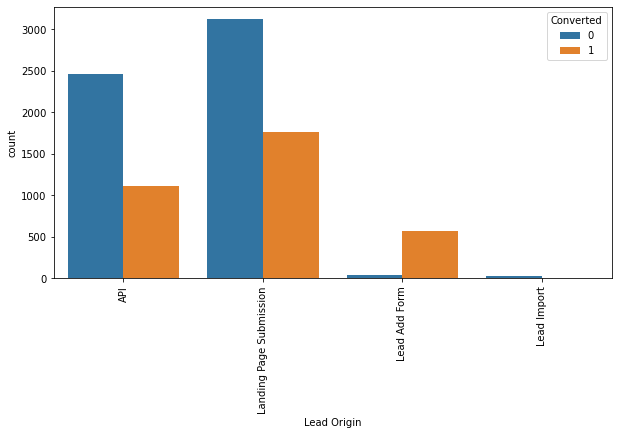

In [44]:
#visualizing the column Lead Origin

plt.figure(figsize=(10,5))
lo=sns.countplot(leads_df['Lead Origin'], hue=leads_df.Converted)
lo.set_xticklabels(lo.get_xticklabels(),rotation=90)
plt.show()

We can see that the customers from the API,landing page submission has higher number of leads.<br>
Lead Add form has the highest conversion rate among others but the count of Lead Add form is low.


In [45]:
#Let us observe last notable activity col
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [46]:
#Let us replace the less frequent values with Others.
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

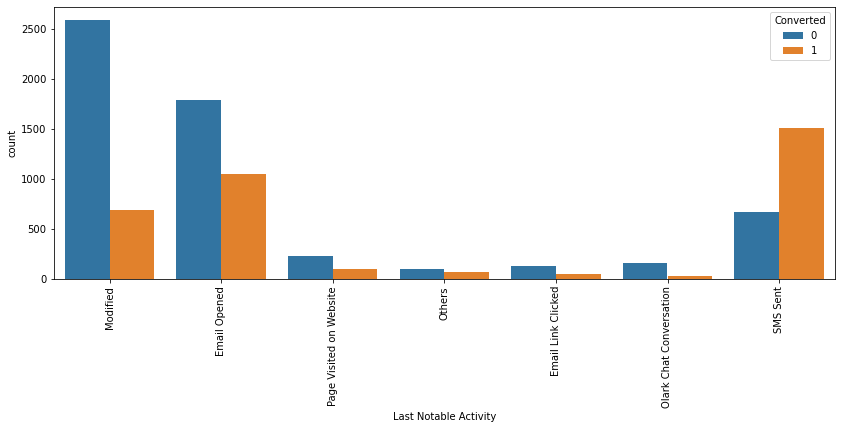

In [47]:
# visualizing the Last Notable Activity column

plt.figure(figsize = (14,5))
ln=sns.countplot(leads_df['Last Notable Activity'], hue = leads_df['Converted'])
ln.set_xticklabels(ln.get_xticklabels(),rotation=90)
plt.show()

We can see that leads whose Last notable activity was SMS sent has higher conversion rate.

In [48]:
#let us drop irrelevant cols which are not required for analysis.
drop_cols=['Prospect ID','Lead Number','Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']
leads_df.drop(drop_cols,axis=1,inplace=True)

In [49]:
leads_df.shape

(9103, 14)

In [50]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### 3.2 Numeric Variable Analysis.

<AxesSubplot:>

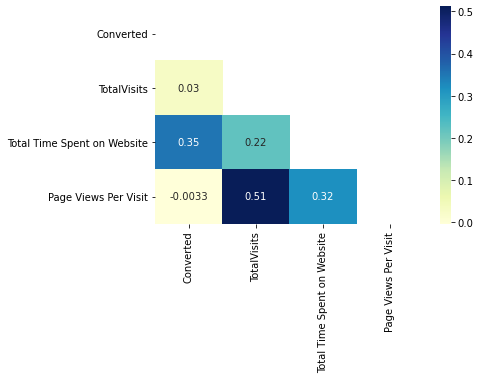

In [51]:
#Let us check how the numeric variables are correlated.
sns.heatmap(leads_df.corr(),annot=True,cmap='YlGnBu',mask=np.triu(leads_df.corr()))

Total Visits and Page Views per Visit has a good positive correlation which is very obvious.

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

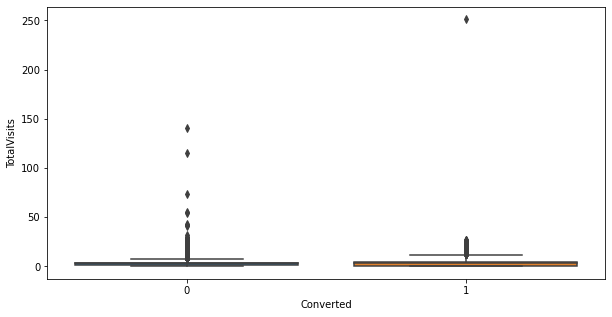

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(leads_df['Converted'],leads_df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

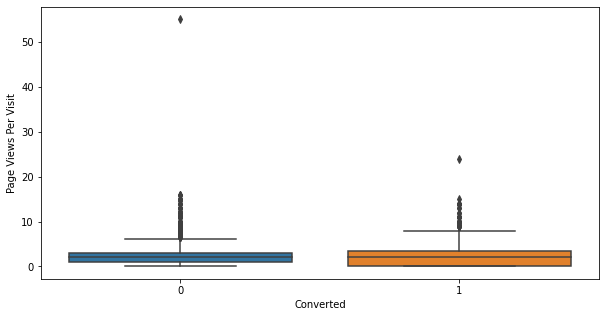

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(leads_df['Converted'],leads_df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

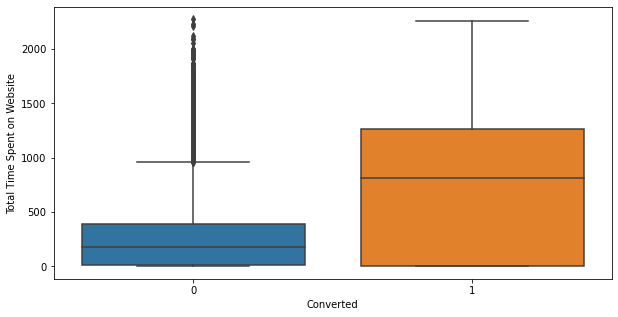

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(leads_df['Converted'],leads_df['Total Time Spent on Website'])

Leads who are spending more time on website are mostly converting.

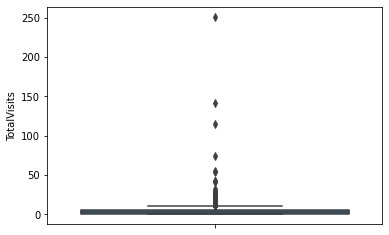

In [55]:
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

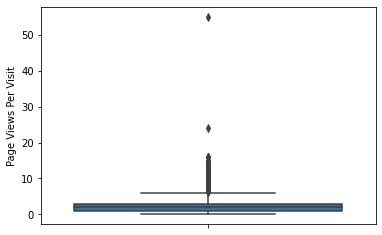

In [56]:
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

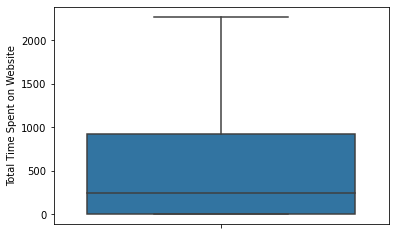

In [57]:
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()

### 3.3 Handling Outliers 

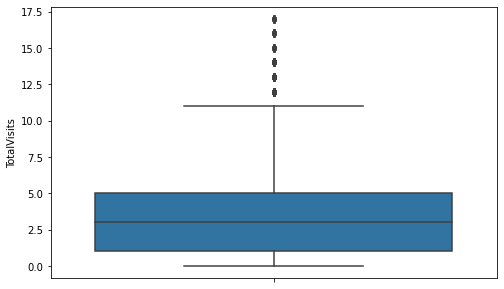

In [58]:
# We have seen that Total Visit column has outliers.Let's handle them.

Q3 = leads_df['TotalVisits'].quantile(0.99)
leads_df = leads_df[leads_df['TotalVisits'] <= Q3]
Q1 = leads_df['TotalVisits'].quantile(0.01)
leads_df = leads_df[leads_df['TotalVisits'] >= Q1]

plt.figure(figsize=(8,5))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [59]:
leads_df.shape

(9020, 14)

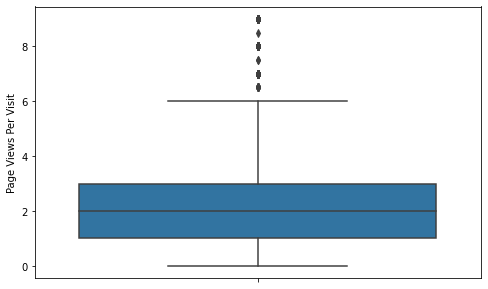

In [60]:
# We have seen that Page Views Per Visit column has outliers.

Q3 = leads_df['Page Views Per Visit'].quantile(0.99)
leads_df = leads_df[leads_df['Page Views Per Visit'] <= Q3]
Q1 = leads_df['Page Views Per Visit'].quantile(0.01)
leads_df = leads_df[leads_df['Page Views Per Visit'] >= Q1]

plt.figure(figsize=(8,5))
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

In [61]:
leads_df.shape

(8953, 14)

## 4. Preparing data for Modeling

In [62]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [63]:
#Identifying categorical variables
categorical_cols=leads_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [64]:
#Converting binary categorical cols-A free copy of Mastering The Interview' and 'Do Not Email' into 0s and 1s
binary_categorical_cols=['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes':1,"No":0})
leads_df[binary_categorical_cols]=leads_df[binary_categorical_cols].apply(binary_map)

In [65]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [66]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

#Generating dummy cols for Lead Origin,current occupation and city
lo_df=pd.get_dummies(leads_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
leads_df=pd.concat([leads_df,lo_df],axis=1)




#Generating dummy cols for Specilalization
sp_df=pd.get_dummies(leads_df['Specialization'],prefix='Specialization')
leads_df=pd.concat([leads_df,sp_df],axis=1)
leads_df.drop('Specialization_Not Specified',axis=1,inplace=True)

#Generating dummy cols for Lead Source
ls_df=pd.get_dummies(leads_df['Lead Source'],prefix='Lead Source')
leads_df=pd.concat([leads_df,ls_df],axis=1)
leads_df.drop('Lead Source_Others',axis=1,inplace=True)

#Generating dummy cols for Last Activity
la_df=pd.get_dummies(leads_df['Last Activity'],prefix='Last Activity')
leads_df=pd.concat([leads_df,la_df],axis=1)
leads_df.drop('Last Activity_Others',axis=1,inplace=True)

#Generating dummy cols for Notable Activity
ln_df=pd.get_dummies(leads_df['Last Notable Activity'],prefix='Last Notable Activity')
leads_df=pd.concat([leads_df,ln_df],axis=1)
leads_df.drop('Last Notable Activity_Others',axis=1,inplace=True)

#Generating dummy cols for Tags
tg_df=pd.get_dummies(leads_df['Tags'],prefix='Tags')
leads_df=pd.concat([leads_df,tg_df],axis=1)
leads_df.drop('Tags_Not Specified',axis=1,inplace=True)

In [67]:
leads_df.drop(categorical_cols,1,inplace=True)

In [68]:
leads_df.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
leads_df.shape

(8953, 57)

## 4. Model Building

In [70]:
#Storing target and feature variables
y=leads_df['Converted']
X=leads_df.drop('Converted',axis=1)

In [71]:
#splitting training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [72]:
#Looking at number of rows and cols in train dataset
X_train.shape

(6267, 56)

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Feature Scaling

In [74]:
# Scaling numeric columns
scaler=StandardScaler()
num_cols=X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

In [75]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Feature Selection using RFE

In [76]:
lr=LogisticRegression()
rfe=RFE(lr,15) #running RFE with 15 variables as output
rfe=rfe.fit(X_train,y_train)

In [77]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [79]:
cols=X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Assessing the model with StatsModels

### Model 1

In [80]:
#Model 1
X_train_sm=sm.add_constant(X_train[cols])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Mon, 13 Jun 2022   Deviance:                       2509.3
Time:                        17:12:08   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [81]:
#Let us drop the Lead Source_Referral Sites' column as it has high p-value
cols=cols.drop('Lead Source_Referral Sites',1)

### Model 2 

In [82]:

X_train_sm=sm.add_constant(X_train[cols])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Mon, 13 Jun 2022   Deviance:                       2510.7
Time:                        17:12:08   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

We see that p-values for all the varibles is zero indicating all the variables are significant.Let us see at VIF to check collinearity between feature variables. 

In [83]:
#Calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train[cols].columns
vif['VIF']=[variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


In [84]:
#We can drop Last Notable Activity_SMS Sent col as it has high VIF
cols=cols.drop('Last Notable Activity_SMS Sent',1)

### Model 3

In [85]:
#Model 3
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Mon, 13 Jun 2022   Deviance:                       2526.6
Time:                        17:12:08   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [86]:
# checking the VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


Since all the values are below 3,all the above features seem to be good

In [87]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [88]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
9196,1,0.283149,9196
4696,0,0.031440,4696
3274,0,0.576636,3274
2164,0,0.006433,2164
1667,1,0.989105,1667


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [89]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [90]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
9196,1,0.283149,9196,0
4696,0,0.031440,4696,0
3274,0,0.576636,3274,1
2164,0,0.006433,2164,0
1667,1,0.989105,1667,1


In [91]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3693,  189],
       [ 281, 2104]])

In [92]:
#Calculating Accuracy
print('Accuracy: ',(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))*100)

Accuracy:  92.50039891495133


In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP,TN,FP,FN,sep='\n')

2104
3693
189
281


In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8821802935010482

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.9513137557959814

In [96]:
# Calculate false postive rate - predicting Converted when  didn't Convert
print(FP/ float(TN+FP))

0.04868624420401855


In [97]:
# Checking the positive predictive value

print('Positive Predictive value : ',(TP / float(TP+FP))*100)

Positive Predictive value :  91.75752289576974


In [98]:
# Checking the negative predictive value

print('Negative Predictive value : ',((TN / float(TN+ FN))*100))

Negative Predictive value :  92.92903875188728


## ROC Curve

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


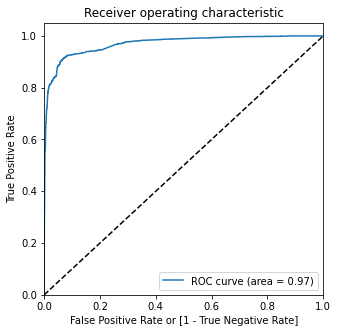

In [101]:
# plotting ROC curve graph

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

We have a good AUC value of 0.97 indicating our model to be a good predictive model

###  Finding Optimal Point CutOff

In [102]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x >i  else 0)

In [103]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
4696,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
3274,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
2164,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


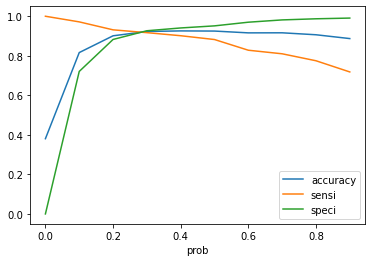

In [105]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [106]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
9196,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
4696,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
3274,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
2164,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
1667,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [107]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
9196,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0,28
4696,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0,3
3274,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1,58
2164,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0,1
1667,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1,99


In [108]:
# Lets calculate  the overall accuracy now

print('Accuracy : ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)*100)

Accuracy :  92.2929631402585


In [109]:
#Obtaining confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2

array([[3597,  285],
       [ 198, 2187]])

In [110]:
# True positive
TP = confusion_2[1,1]

# True negatives
TN = confusion_2[0,0]

# False positives
FP = confusion_2[0,1]

# False negatives
FN = confusion_2[1,0]

In [111]:
# sensitivity

print('Sensitivity : ',(TP / float(TP+FN)*100))

Sensitivity :  91.69811320754717


In [112]:
#specificity

print('Specificity : ',(TN / float(TN+FP)*100))

Specificity :  92.65842349304482


In [113]:
# calculating the False Postive Rate

print('False Postive Rate : ',(FP/ float(TN+FP))*100)

False Postive Rate :  7.341576506955177


In [114]:
# calculating the Positive predictive value 

print('Positive Predictive value : ',(TP / float(TP+FP))*100)

Positive Predictive value :  88.47087378640776


In [115]:
# calculating the Negative predictive value

print('Negative Predictive value : ',(TN / float(TN+ FN))*100)

Negative Predictive value :  94.78260869565217


In [117]:
#calculating precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)


0.9175752289576974

In [119]:
#calculating recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)


0.8821802935010482

### Precision and Recall Tradeoff

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


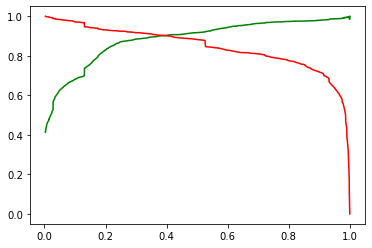

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on Test Set

#### Scaling test data set

In [122]:
num_cols=X_test.select_dtypes(include=['float64','int64']).columns
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [123]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.668862,-0.304384,0.135997,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.030697,-0.538073,0.399961,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.380477,0.794688,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.319082,-0.614753,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [124]:
X_test=X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.304384,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.538073,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.794688,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.614753,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.412100,0,0,0,0,0,0,0,0,0,0,0,1


In [125]:
X_test_sm=sm.add_constant(X_test)

In [126]:
y_test_pred=res.predict(X_test_sm)

In [127]:
y_test_pred[:10]

7681    0.024968
984     0.025965
8135    0.682639
6915    0.005953
2712    0.953578
244     0.002388
4698    0.014927
8287    0.028022
6791    0.981374
8970    0.005736
dtype: float64

In [128]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.024968
984,0.025965
8135,0.682639
6915,0.005953
2712,0.953578


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [130]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [131]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024968
1,0,984,0.025965
2,0,8135,0.682639
3,0,6915,0.005953
4,1,2712,0.953578


In [134]:
# renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [135]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024968
1,0,984,0.025965
2,0,8135,0.682639
3,0,6915,0.005953
4,1,2712,0.953578


In [136]:
# rearranging the columns of dataframe

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

In [137]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024968,2
1,984,0,0.025965,3
2,8135,0,0.682639,68
3,6915,0,0.005953,1
4,2712,1,0.953578,95


In [138]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024968,2,0
1,984,0,0.025965,3,0
2,8135,0,0.682639,68,1
3,6915,0,0.005953,1,0
4,2712,1,0.953578,95,1


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9270290394638868

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1564,  112],
       [  84,  926]])

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9168316831683169

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.9331742243436754

In [144]:
#Let us calculate precision 
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8921001926782274

In [145]:
#Let us calculate Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9168316831683169